In [4]:
import pandas as pd
pd.set_option("display.max_columns",101)
# extra imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from category_encoders import OrdinalEncoder


ModuleNotFoundError: No module named 'category_encoders'

# Data Description
Step 3: Explore and analyze the data
Perform exploratory data analysis, check for missing values, and visualize the data using seaborn and matplotlib.

Step 4: Preprocess the data
Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical variables.

Step 5: Feature engineering
Based on the analysis, create new features that might help improve the model's performance.

Step 6: Split the data

Step 7: Train the model
Choose an appropriate machine learning algorithm (e.g., logistic regression, decision trees, random forests, etc.) and train the model using the training data.

model = LogisticRegression()
model.fit(X_train, y_train)

Step 8: Evaluate the model
Evaluate the model's performance using the validation data.

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Step 9: Predict and create the submission file
Use the trained model to predict the test data and create the submission file.

test_pred = model.predict(test_data)
submission = pd.DataFrame({'Id': test_data['Id'], 'Is_cancelled': test_pred})
submission.to_csv('submissions.csv', index=False)

Step 10: Visualize and explain the results
Create visualizations to explain the model's performance, feature importances, and any other relevant insights.

This is a high-level guide to help you build a Jupyter Notebook for this problem. You can follow these steps and create visualizations to demonstrate the analysis and modeling process. Make sure to annotate the notebook with markdown cells and include explanations for each step so that anyone reading the notebook can understand the thought process and reasoning behind your decisions.










In [ ]:
1 - Analizar o describe do dataframe, outliers e refereir que poderia fazer standardizacao dos dados consoante o modelo..
2 - Fazer visualizatcao dos dados, e documentar
2.1 - Fazer Pearson Corr.
3 - Feature engineering com One hot encoder, dummy variables
4 - Fazer GridSearchCV
5 - Criar varios modelos e testar 
6 - Sacar as 10 variaveis mais importantes
7 - Fazer uma conclusao no que poderia ser melhorado e qual o melhor modelo (para ja)

In [ ]:
df.describe()
# Max > Mean & Median (50%) = Outliers
# Here, the Max value is significantly greater than both Mean and the Median value. Hence, we can sense the presence of Outliers
# If the mean is significantly different from the median, it could indicate the presence of outliers or a skewed distribution.
# the mean is greater than the median, the distribution is right-skewed; if the mean is less than the median, the distribution is left-skewed.
df.describe(include='all')


In [ ]:
df.isnull().sum() 
# If zero then we don't need to do any interpolations

In [ ]:
# Visualization of the data.
# Univeariate analysis
fig = plt.figuere(figsize=(24,15))
i = 0
for column in df:
    sub = fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i += 1

In [ ]:
# Data Distribution
fig, ax = plt.subplots(4, 4, figsize=(40, 30))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.distplot(df[var], ax=subplot, fit=norm)

# Define the variables we want to see the distribution off
variables = df[numerical_variables]

# Plot
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
variables.hist(bins=15, figsize=(40, 30), layout=(4, 4));

#### Distribution of numerical variables per Deafult Status
fig, ax = plt.subplots(4, 4, figsize=(40,30))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.boxplot(x=df[var], y=df['Default Loan'], ax=subplot)


In [ ]:
# target variable distribution 
sns.set(style="darkgrid")
ax = sns.countplot(x="STATUS", data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Status')
plt.ylabel('Count')
# plt.savefig('./plots/status_count.png')
plt.show()


In [ ]:
list(set(df.dtypes.tolist()))
# [dtype('int64'),dtype('O'),dtype('float64')]

# Numerical data distribution
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()

df_num.hist(figsize=(16,10), 
            bins = 50,
            xlabelsize=8,
            ylabelsize=8
            );

# Correlation
# Now we will try to fin which features are strongly correlated with our target var.

df_num_corr = df_num.corr()['SalePrice'][:-1] # To exclude our target var.
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending = False)
print(f"There is {len(features_list)} strongly correlated values with:\n {features_list}")

# or ...... 
# Correlation Heatmap

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, ax=ax)
# plt.savefig('./plots/correlation_heatmap.png')
plt.show()


# This is a list of the strongly correlated values but this list is incomplete as we know that correlation is affected by outliers...

# Non-numerical features
df_not_num = df_categ.select_dtypes(include=['O'])

plt.figure(figsize = (10,6))
ax = sns.boxplot(x='vdf',y=target_Var, data =df_categ)

In [ ]:
# Categorical Features vs target - Grouped bar chart
# bar plot
cat_list = ['sex','co','fbs','bla']
fig = plt.figure(figsize = (16,8))
for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2,4,i+1)
    chart = sns.countplot(data = df, 
                          x=column,
                          hue = 'target')

In [ ]:
# Numerical Features vs target box plot
num_list = ['age','trsdsa']
fig = plt.figure(figsize = (15,10))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2,3,i+1)
    sns.boxplot(x = 'target', y=column, data = df)

In [ ]:
# Data transformation
Using dummies values approach.
This approach is more flexible because it allows encoding as many category columns as desired.

# Generate binary values using get_dummies
df_dummies = pd.get_dummies(df, columns=[‘col’], prefix = [‘dummy”])

# merge with original df on key values
df_with_dummy = df.join(df_dummies)
df_with_dummy

In [ ]:
# apply standardization ?
# scaling features to have zero mean and unit variance


In [ ]:
# Check if the dataset it's balanced

target_pct = pd.DataFrame(df_final.groupby(['Default Loan'])['Default Loan'].count())
target_pct['%'] = (target_pct['Default Loan'] / target_pct['Default Loan'].sum())*100
target_pct

# We have an imbalanced dataset, which may cause overfititng on the model. 
# We could do oversampling or undersampling, however once the 'Default' 
# case it's not very frequent, we decided to use the  StratifiedKFold on the Cross-Validation and 
# the GridSearchCV on the hyperparameter tuning stage. in order to overcome the overfititng problem.



In [ ]:
# Normalizing the all the features
# X = features & y = Target class

X = df.drop(['STATUS'], axis=1)
y = df['STATUS']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting dataset into training and testing split with 70-30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-fold splits
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

In [ ]:
# the libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# separating data into training and test
X= train.drop('Cover_Type', axis=1) # cover_type is our target feature, which has 7 classes
y= train['Cover_Type']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.25)

# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=24) # using the random state for reproducibility
forest= RandomForestClassifier(random_state=24)
knn= KNeighborsClassifier()
svm= SVC(random_state=24)
xboost= XGBClassifier(random_state=24)

# now, create a list with the objects 
models= [tree, forest, knn, svm, xboost]

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load your dataset
# Replace this line with your own data loading code
data = pd.read_csv('your_data.csv')

# Preprocess the data
# Encode categorical variables using pd.get_dummies()
data_encoded = pd.get_dummies(data, drop_first=True)
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

best_accuracy = 0
best_classifier = None

# Test each classifier and display the results
for name, model in classifiers:
    # Fit the classifier on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy and cross-validated scores using k-Fold Cross-Validation
    accuracy = accuracy_score(y_test, y_pred)
    cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)
    # used 5 to get low bias and some variance
    mean_test_score = np.mean(cv_results['test_score'])
    
    # Update the best classifier if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = model
    
    # Display the results
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Mean cross-validated test score: {mean_test_score:.4f}")
    print(f"  Classification report:\n{classification_report(y_test, y_pred)}")

# Feature importances for the best classifier (if applicable)
if hasattr(best_classifier, 'feature_importances_'):
    feature_importances = pd.Series(best_classifier.feature_importances_, index=X.columns)
    top_features = feature_importances.nlargest(10)
    print(f"\nTop 10 features for {type(best_classifier).__name__}:\n{top_features}")

# Predict on unseen data
# Replace this line with your own unseen data loading code
unseen_data = pd.read_csv('unseen_data.csv')

# Preprocess and scale the unseen data
unseen_data_encoded = pd.get_dummies(unseen_data, drop_first=True)
unseen_data_scaled = scaler.transform(unseen_data_encoded)

# Make predictions on the unseen data
unseen_pred = best_classifier.predict(unseen_data_scaled)
print("\nPredictions on unseen data:", unseen_pred)


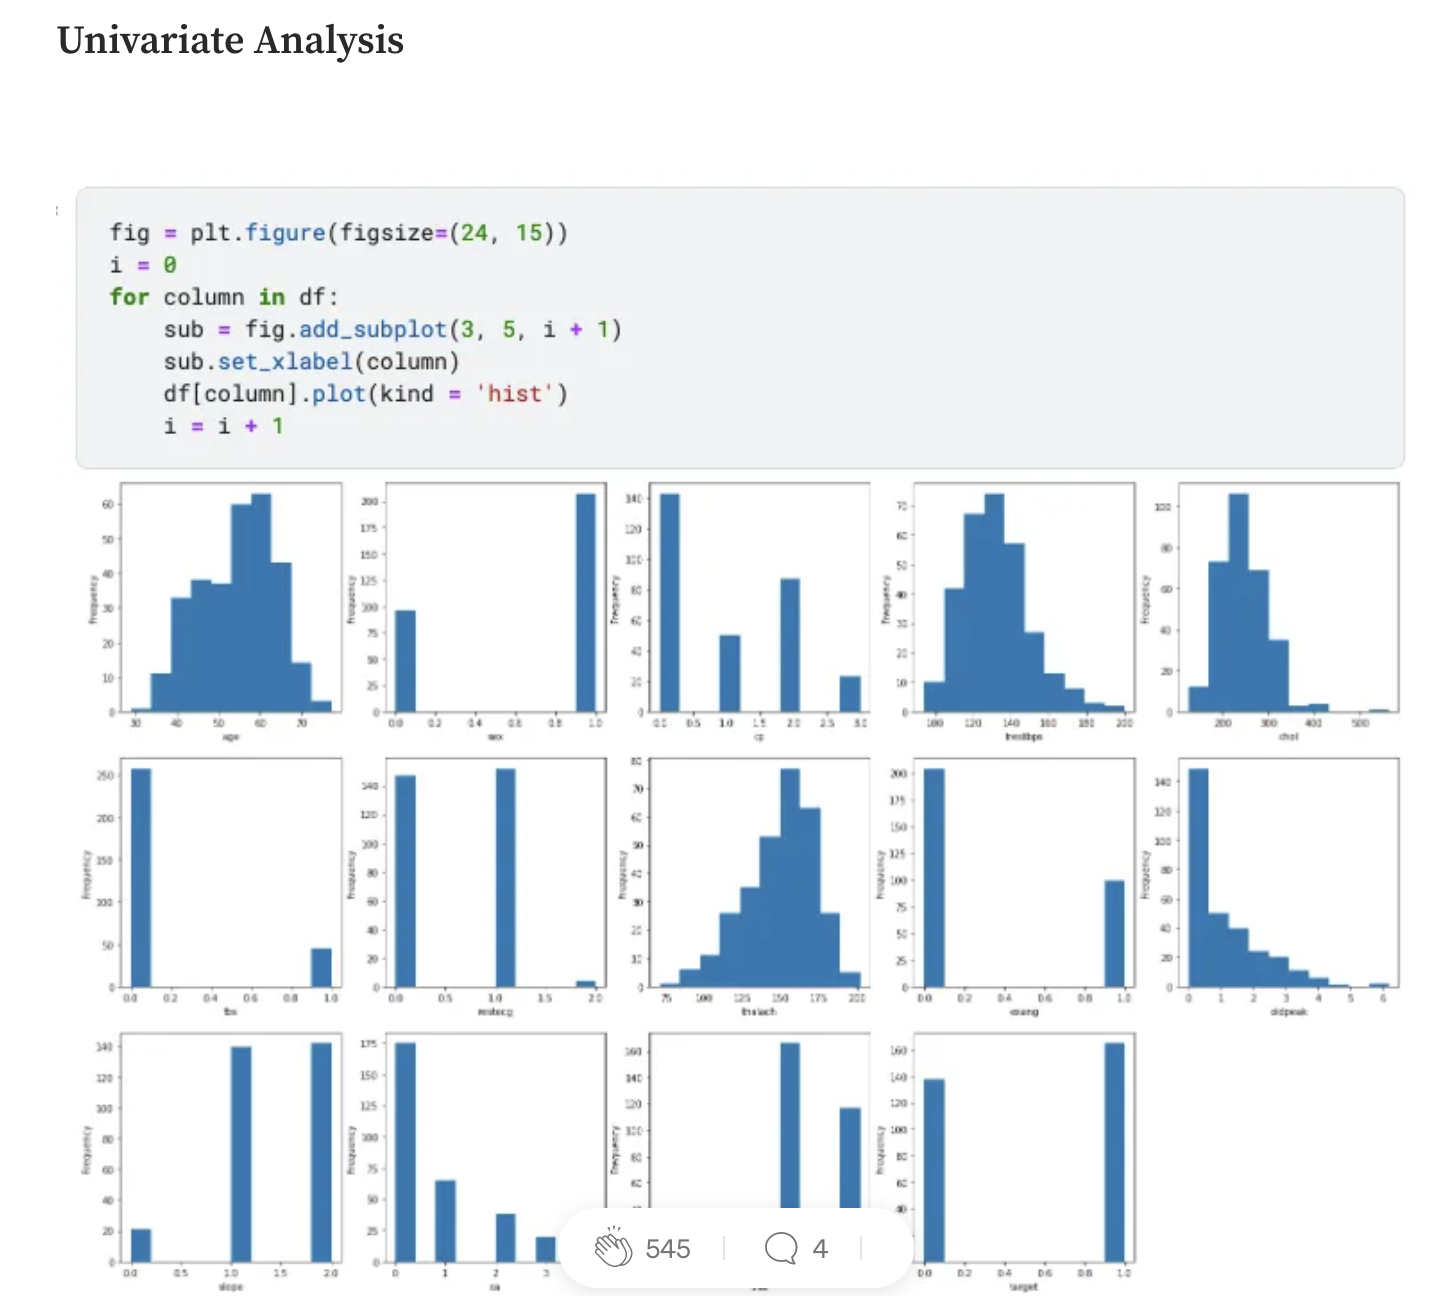

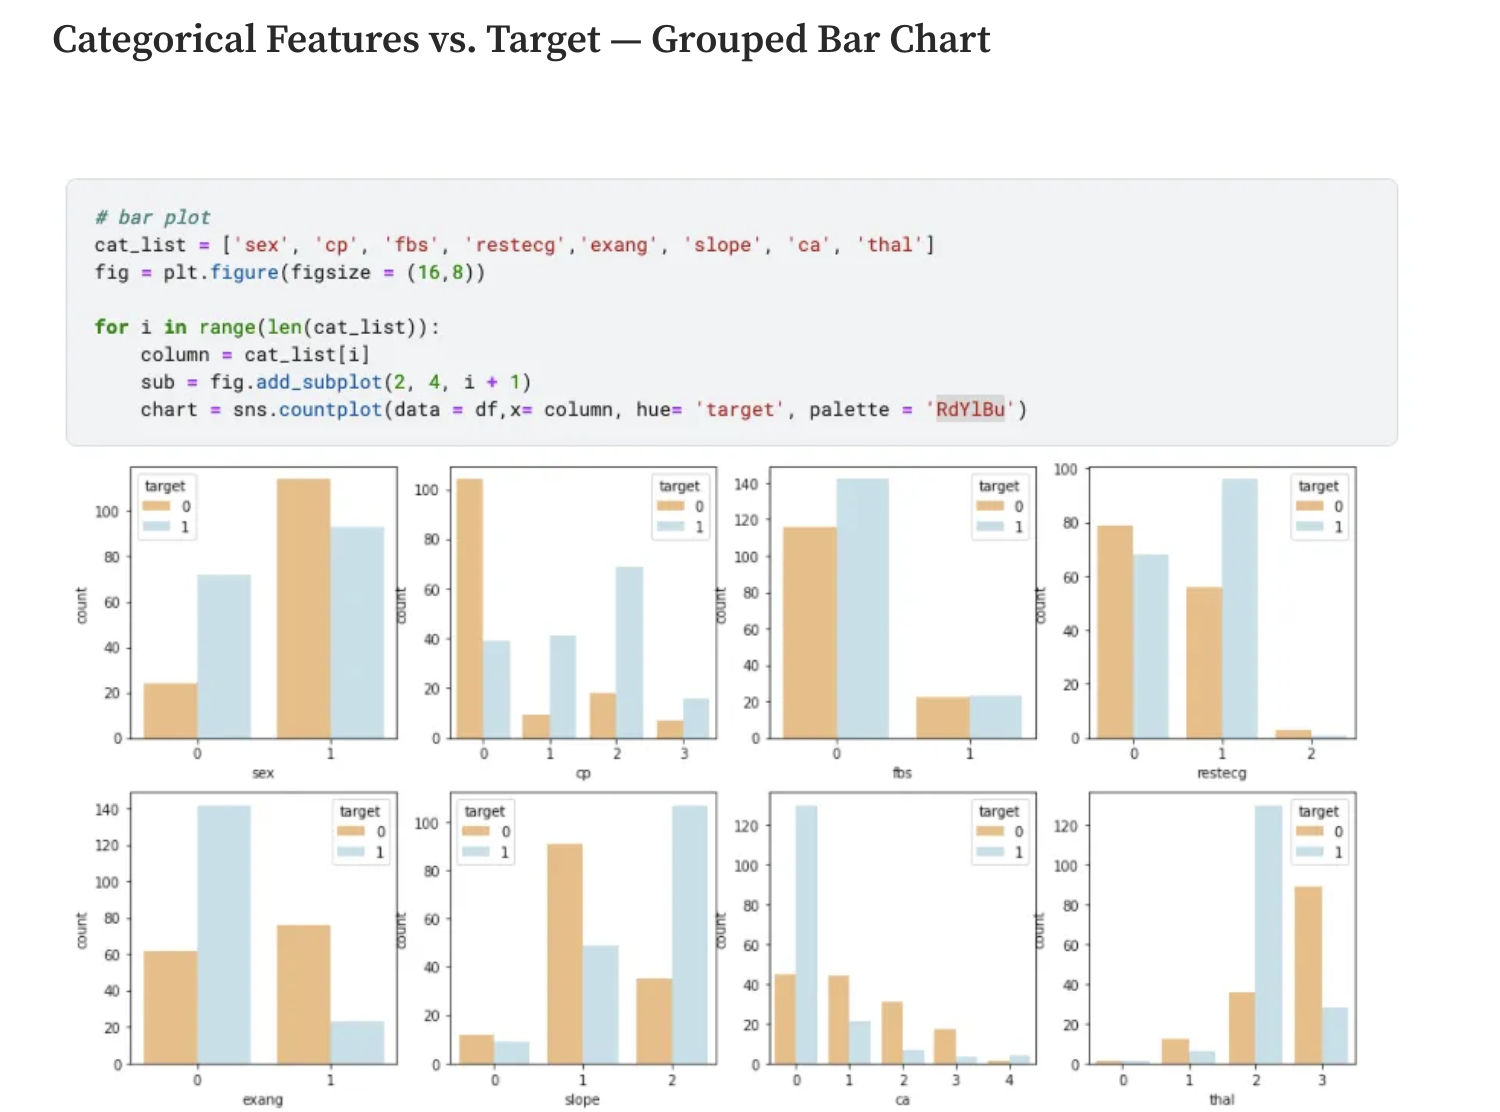

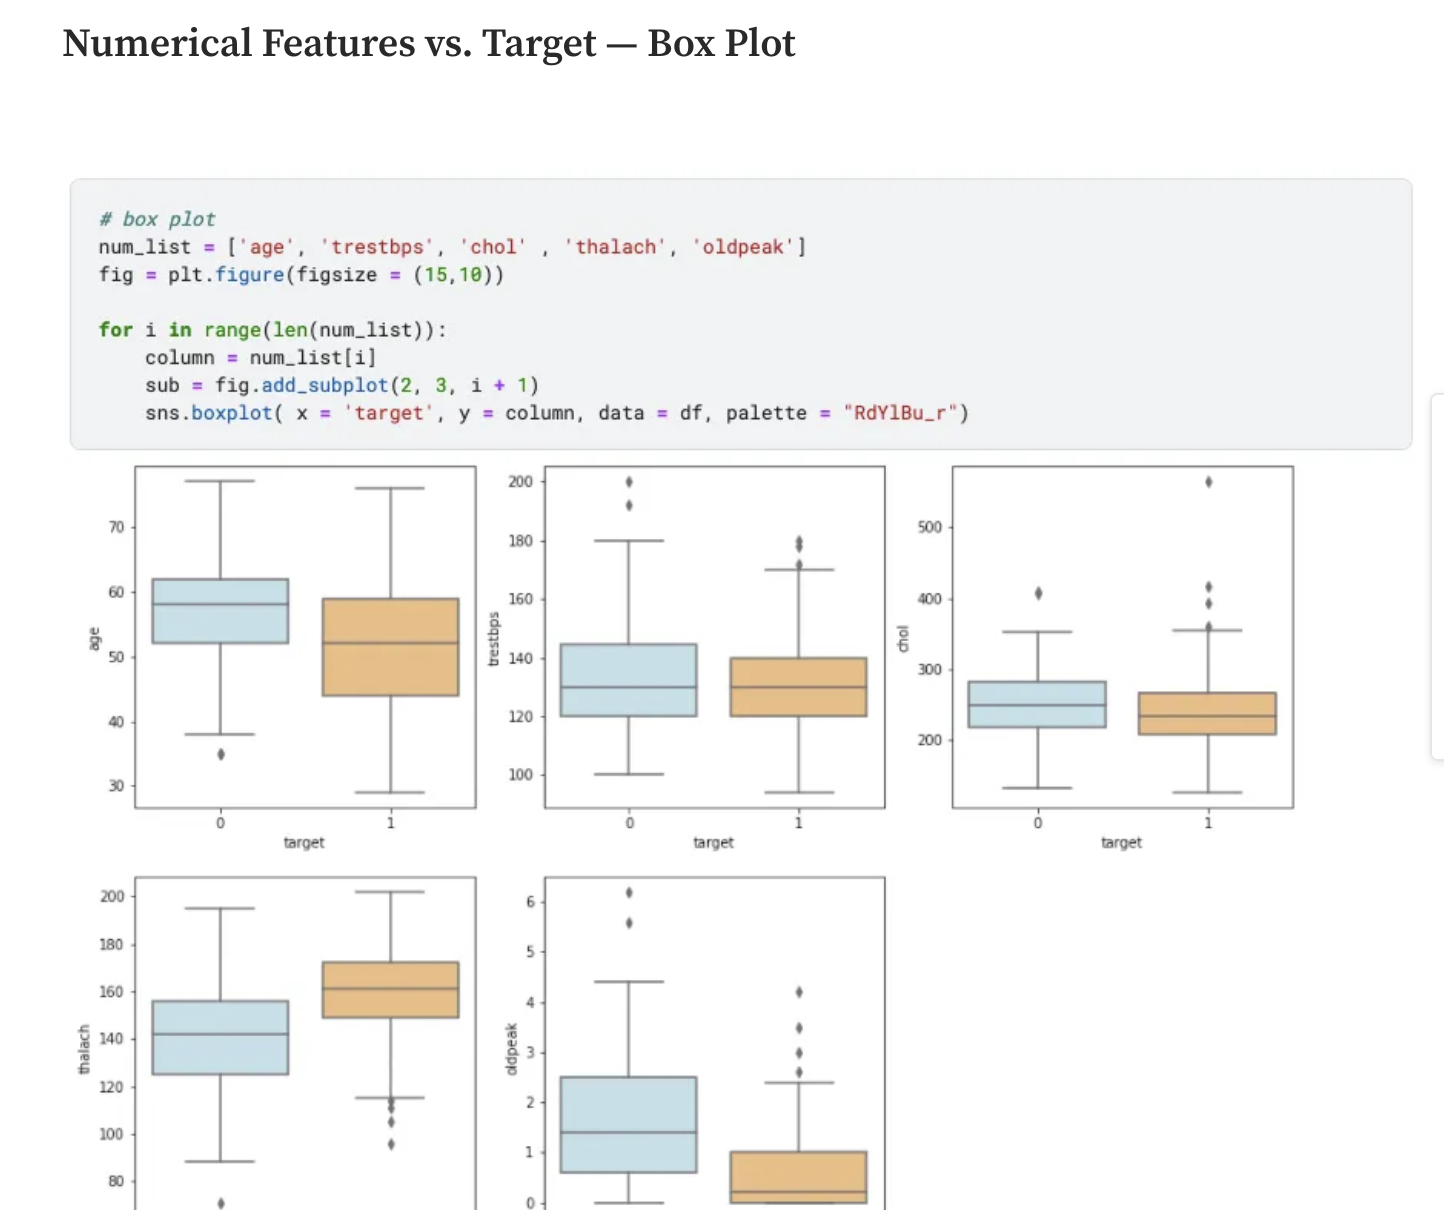

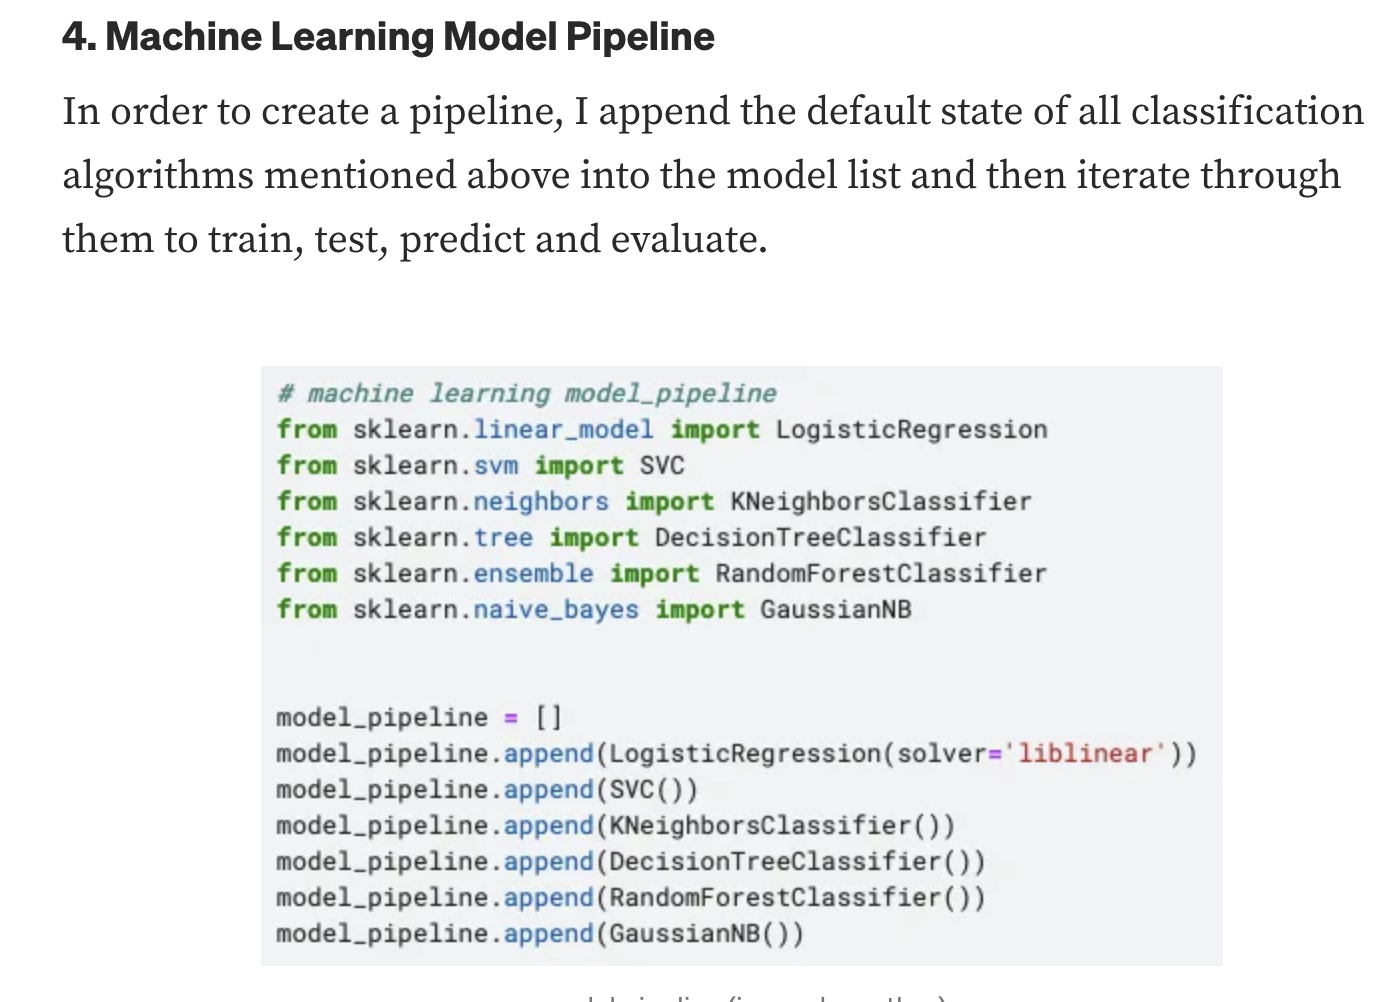

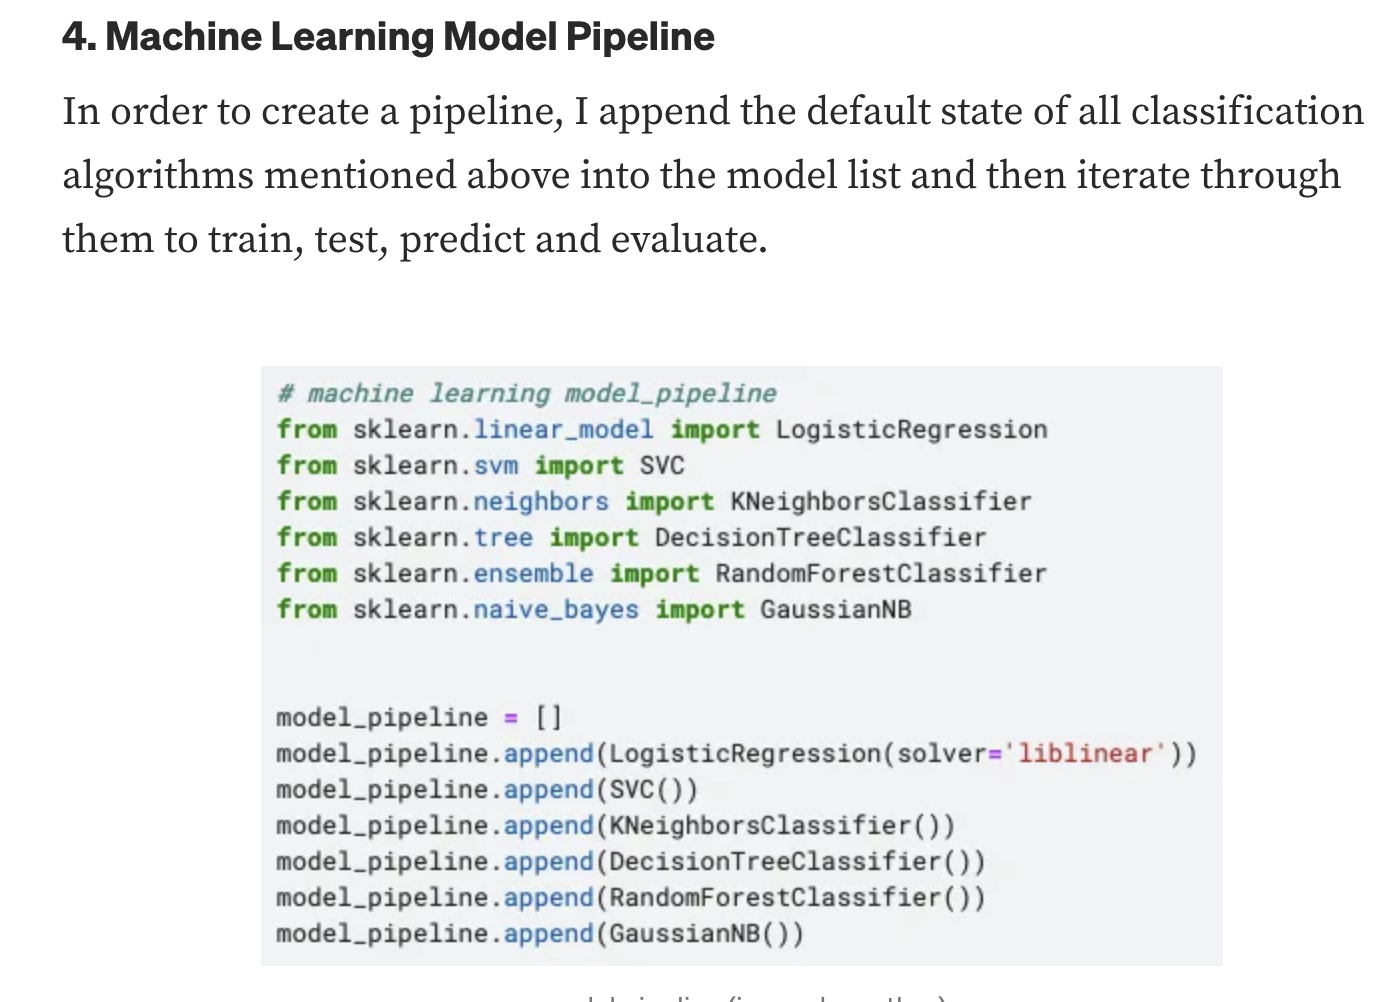

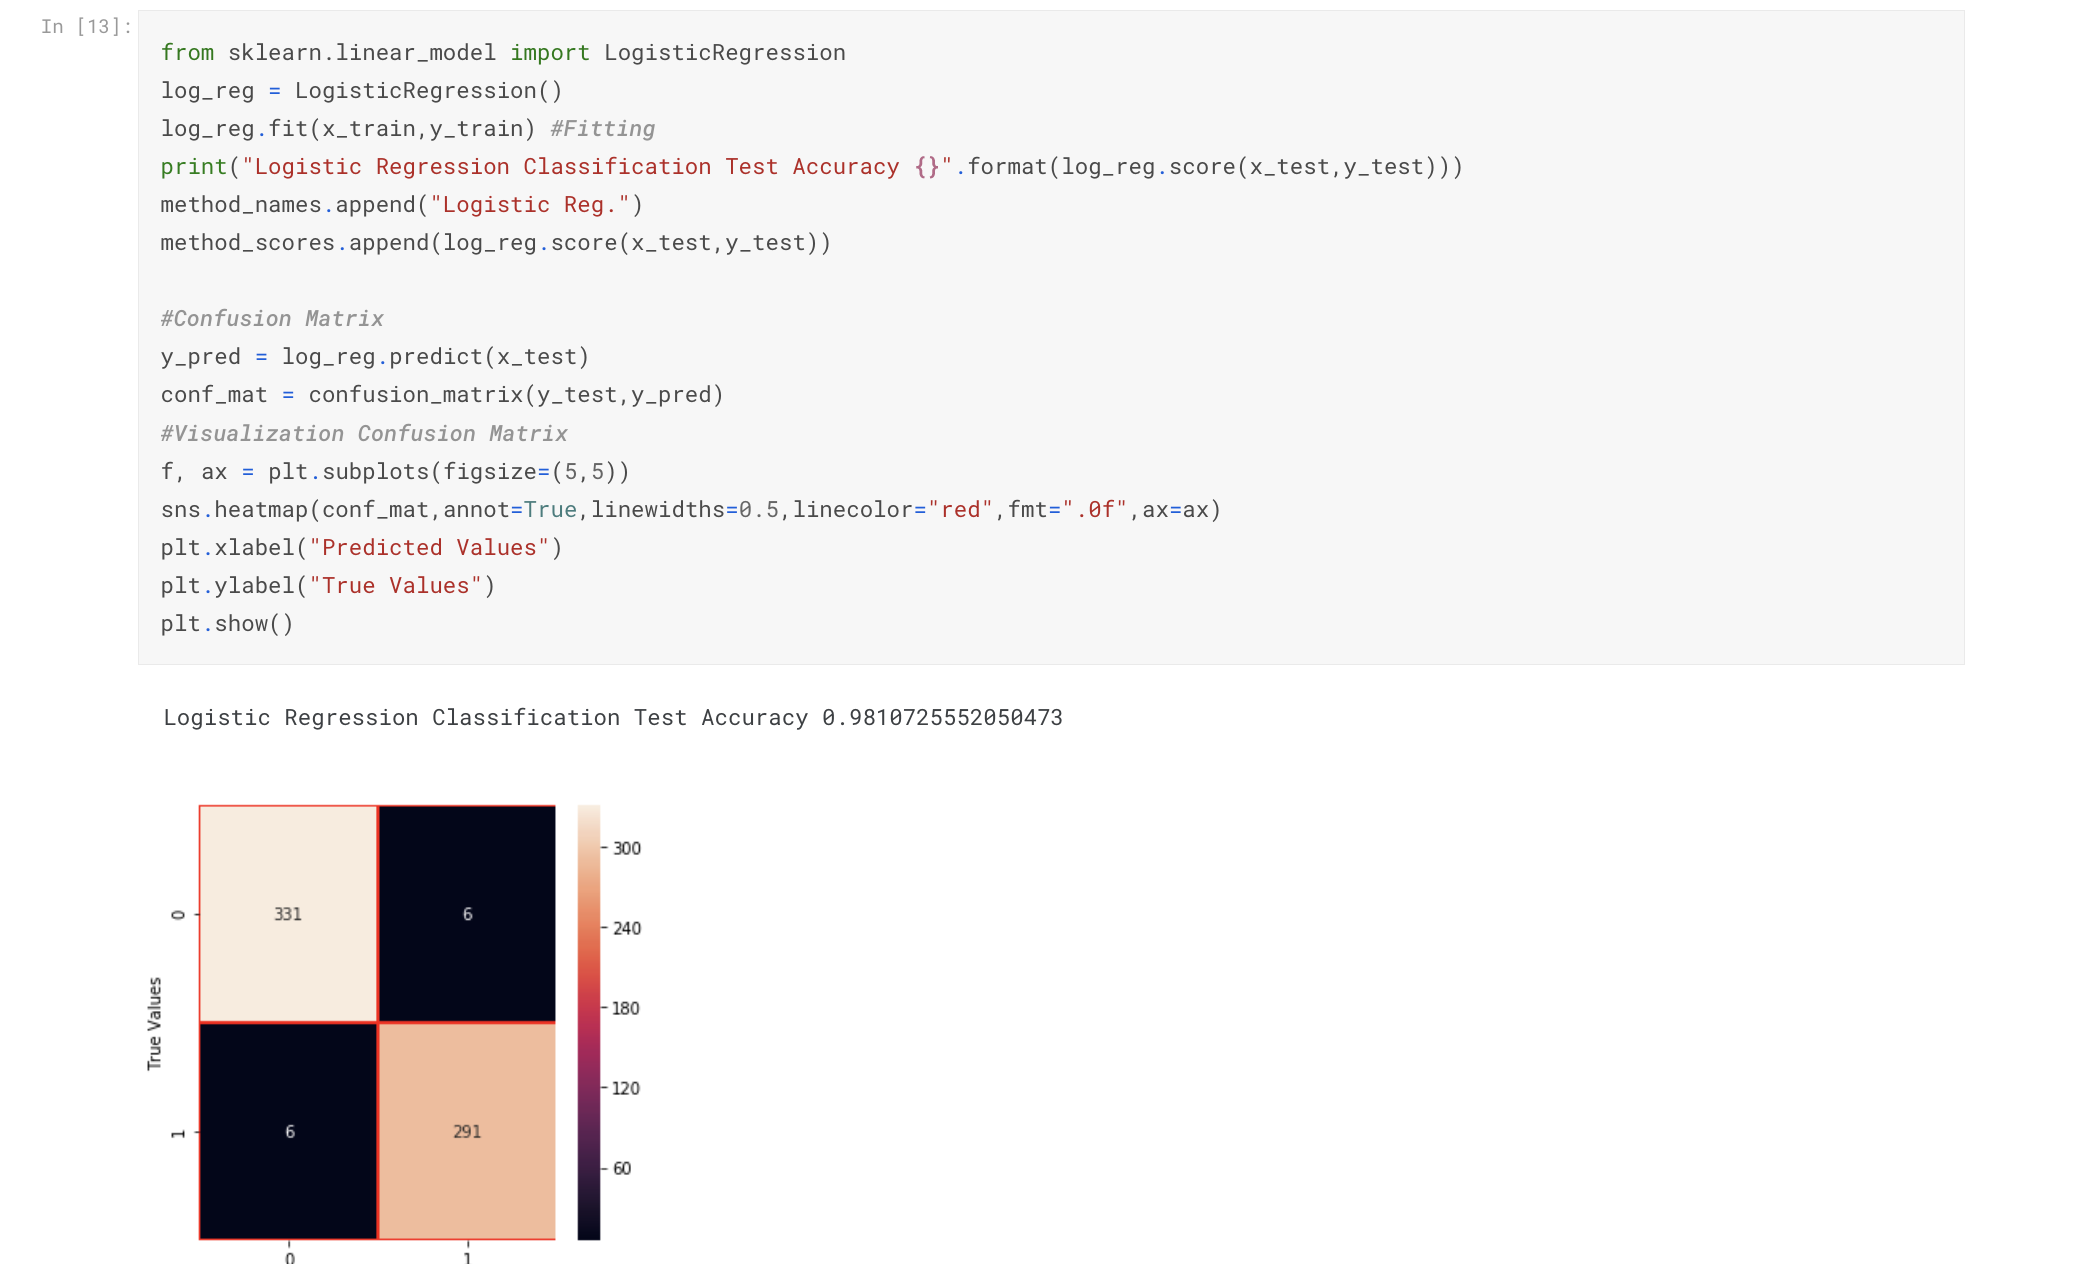

Analise das variaveis categoricas e continuas

https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python?scriptVersionId=734137&cellId=21


In [ ]:
#### Step 3:
https://medium.com/@muralimanohar6/leveraging-the-way-you-interpret-the-descriptive-statistics-in-python-bd2111fb5211
    df.shape
    df.info()
    df.dtypes
    df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

    # Dropping the duplicate rows
    duplicate_rows_df = df[df.duplicated()]
    print("number of duplicate rows: ", duplicate_rows_df.shape)    
    df = df.drop_duplicates()

    # Dropping the missing or null values
    print(df.isnull().sum())
    df = df.dropna()    # Dropping the missing values.
    df.count()
    print(df.isnull().sum())   # After dropping the values

    # Detecting Outliers
    sns.boxplot(x=df['Price'])

    # Define Numerical and Categorical variables:
    numerical_variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt']
    categorical_variables = ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

# Missing values
# Checking percentage of missing values per variable:**

    # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

    # Return the dataframe with missing information
    mis_val_table_ren_columns
 
# Data Distribution
    fig, ax = plt.subplots(4, 4, figsize=(40, 30))
    for var, subplot in zip(df[numerical_variables], ax.flatten()):
        sns.distplot(df[var], ax=subplot, fit=norm)
    #plt.savefig('distribution.png')

# Define the variables we want to see the distribution off
    variables = df[numerical_variables]

    # Plot
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    variables.hist(bins=15, figsize=(40, 30), layout=(4, 4));
    #plt.savefig('distribution2.png')


#### outliers 
# Plot the boxplots for the columns previously defined 
    fig, ax = plt.subplots(4, 4, figsize=(30,20))
    for var, subplot in zip(df[numerical_variables], ax.flatten()):
        sns.boxplot(df[var], ax=subplot)


# Check distribution of target variable
loans_status = pd.DataFrame(df.groupby(['loan_status'])['id'].count())
loans_status.sort_values(by=['id'], ascending=False)


#### Distribution of numerical variables per Deafult Status
fig, ax = plt.subplots(4, 4, figsize=(40,30))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.boxplot(x=df[var], y=df['Default Loan'], ax=subplot)


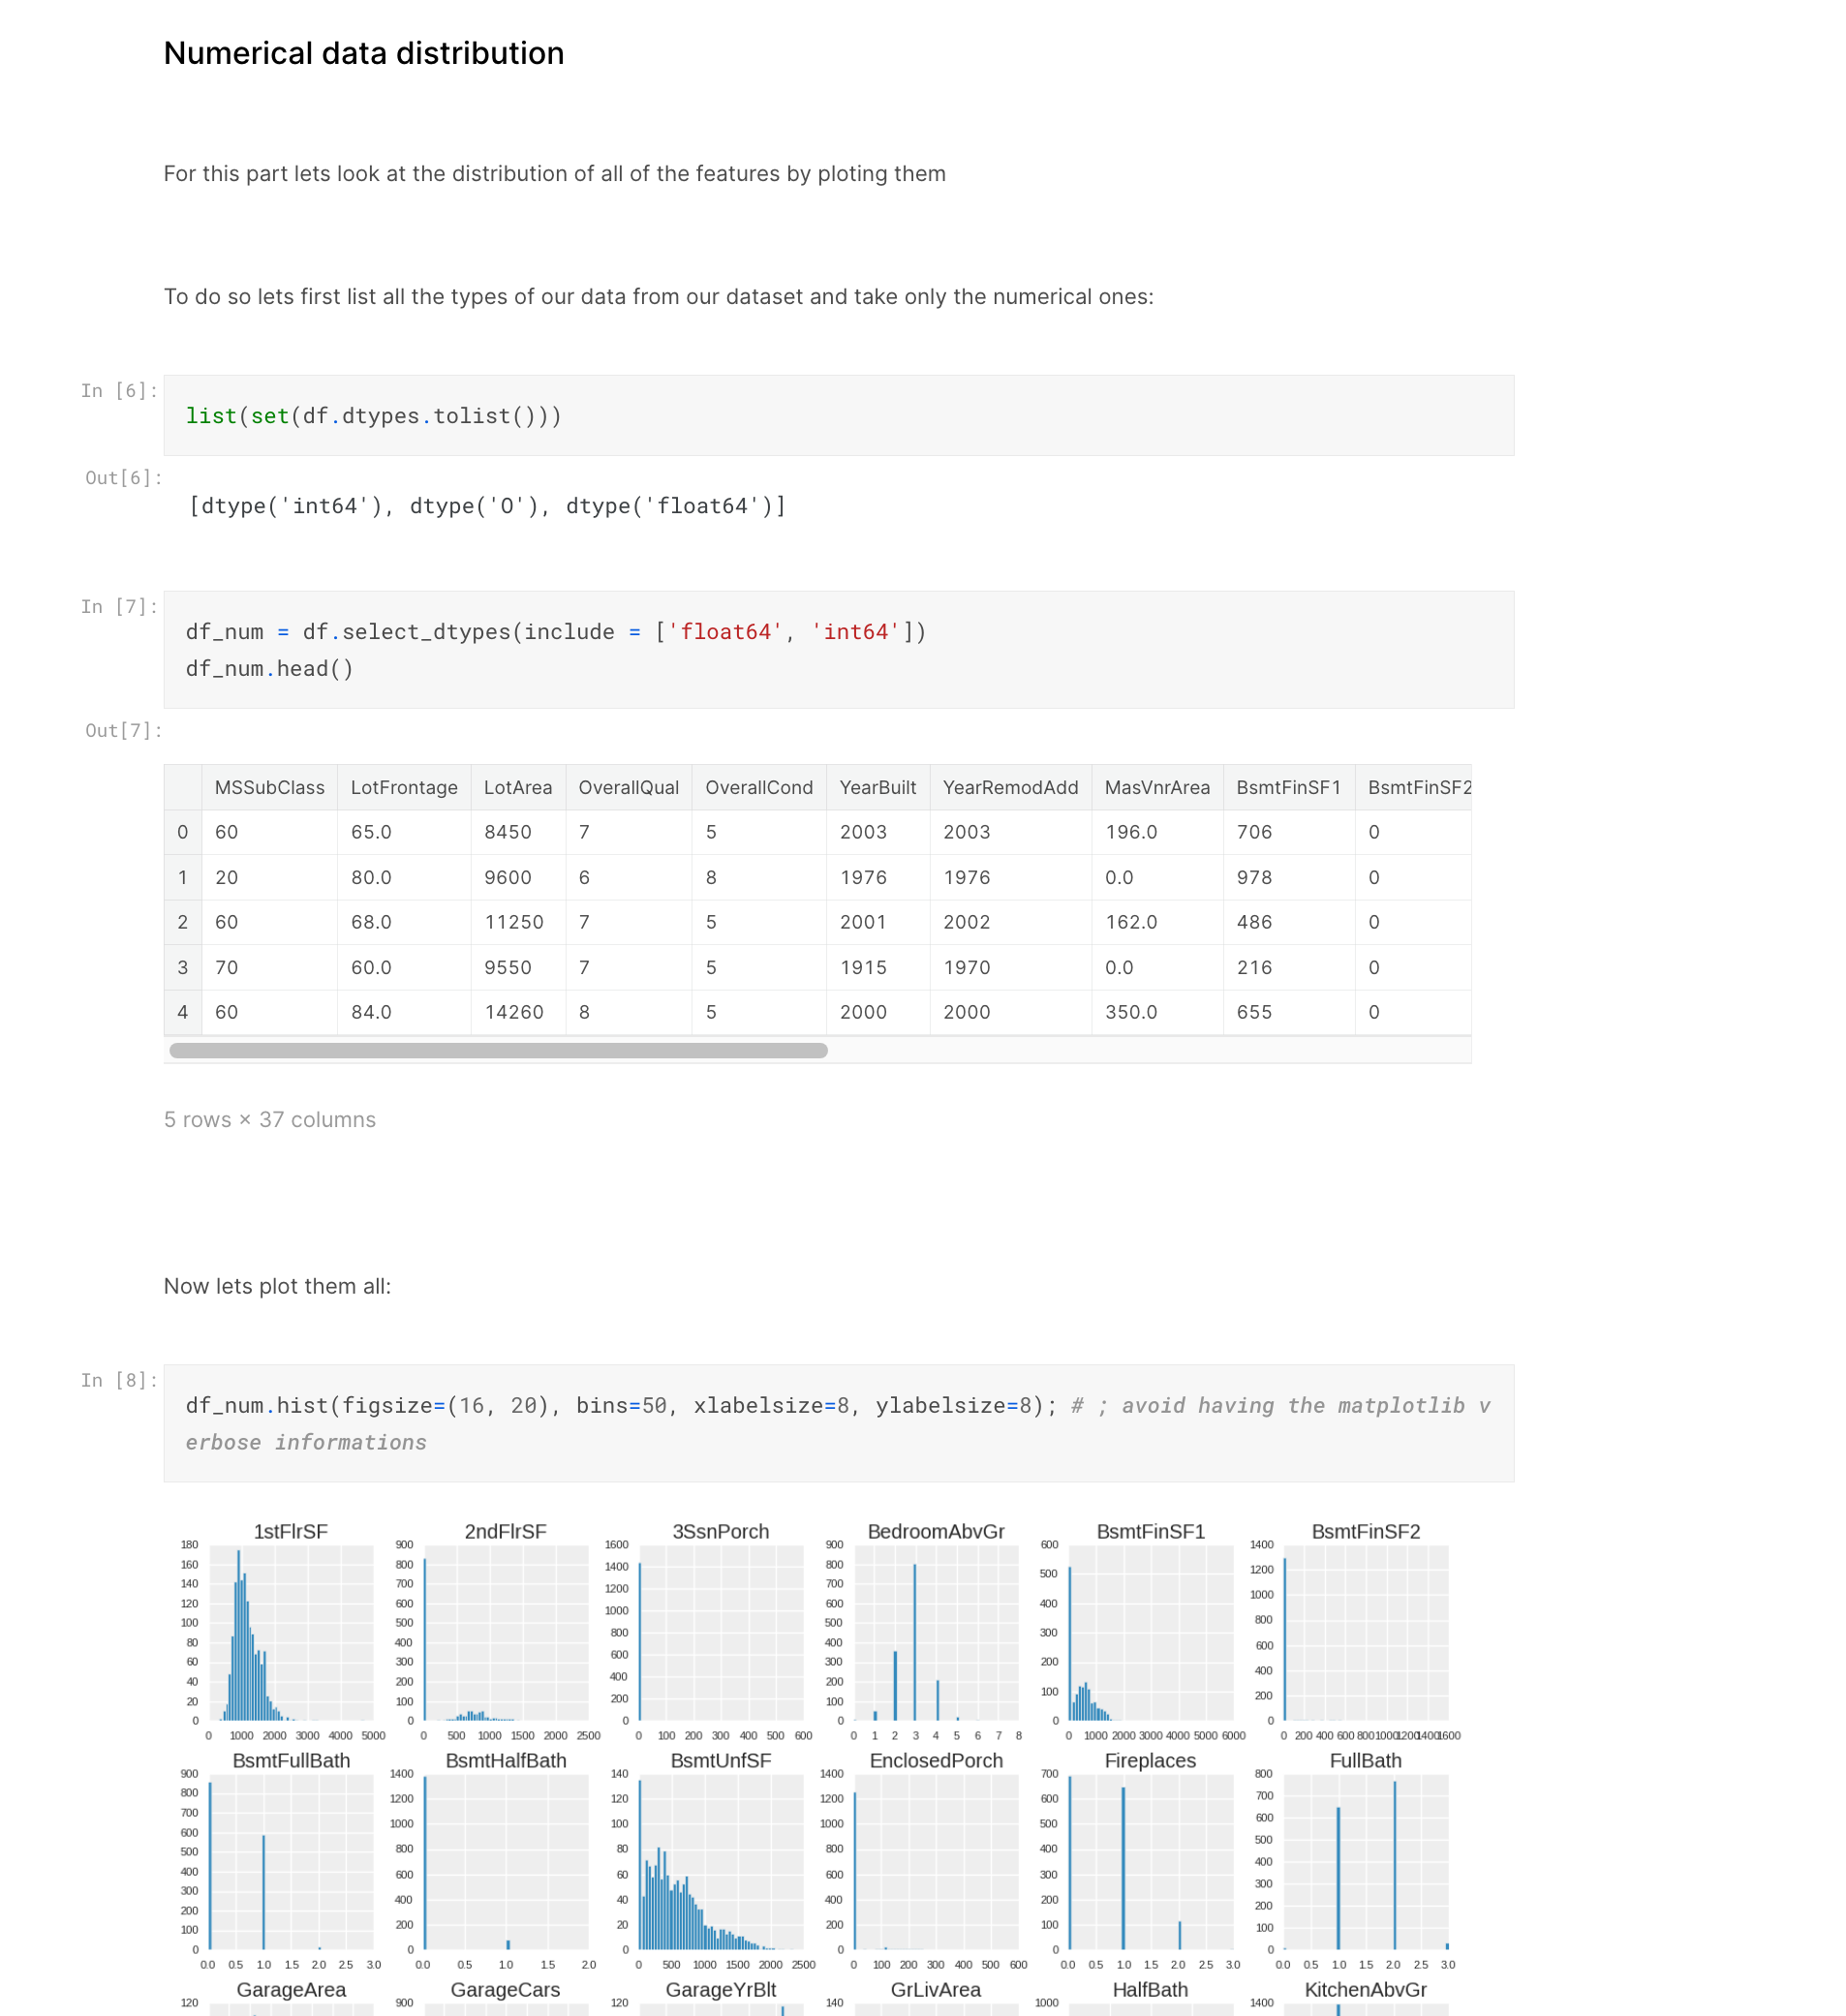

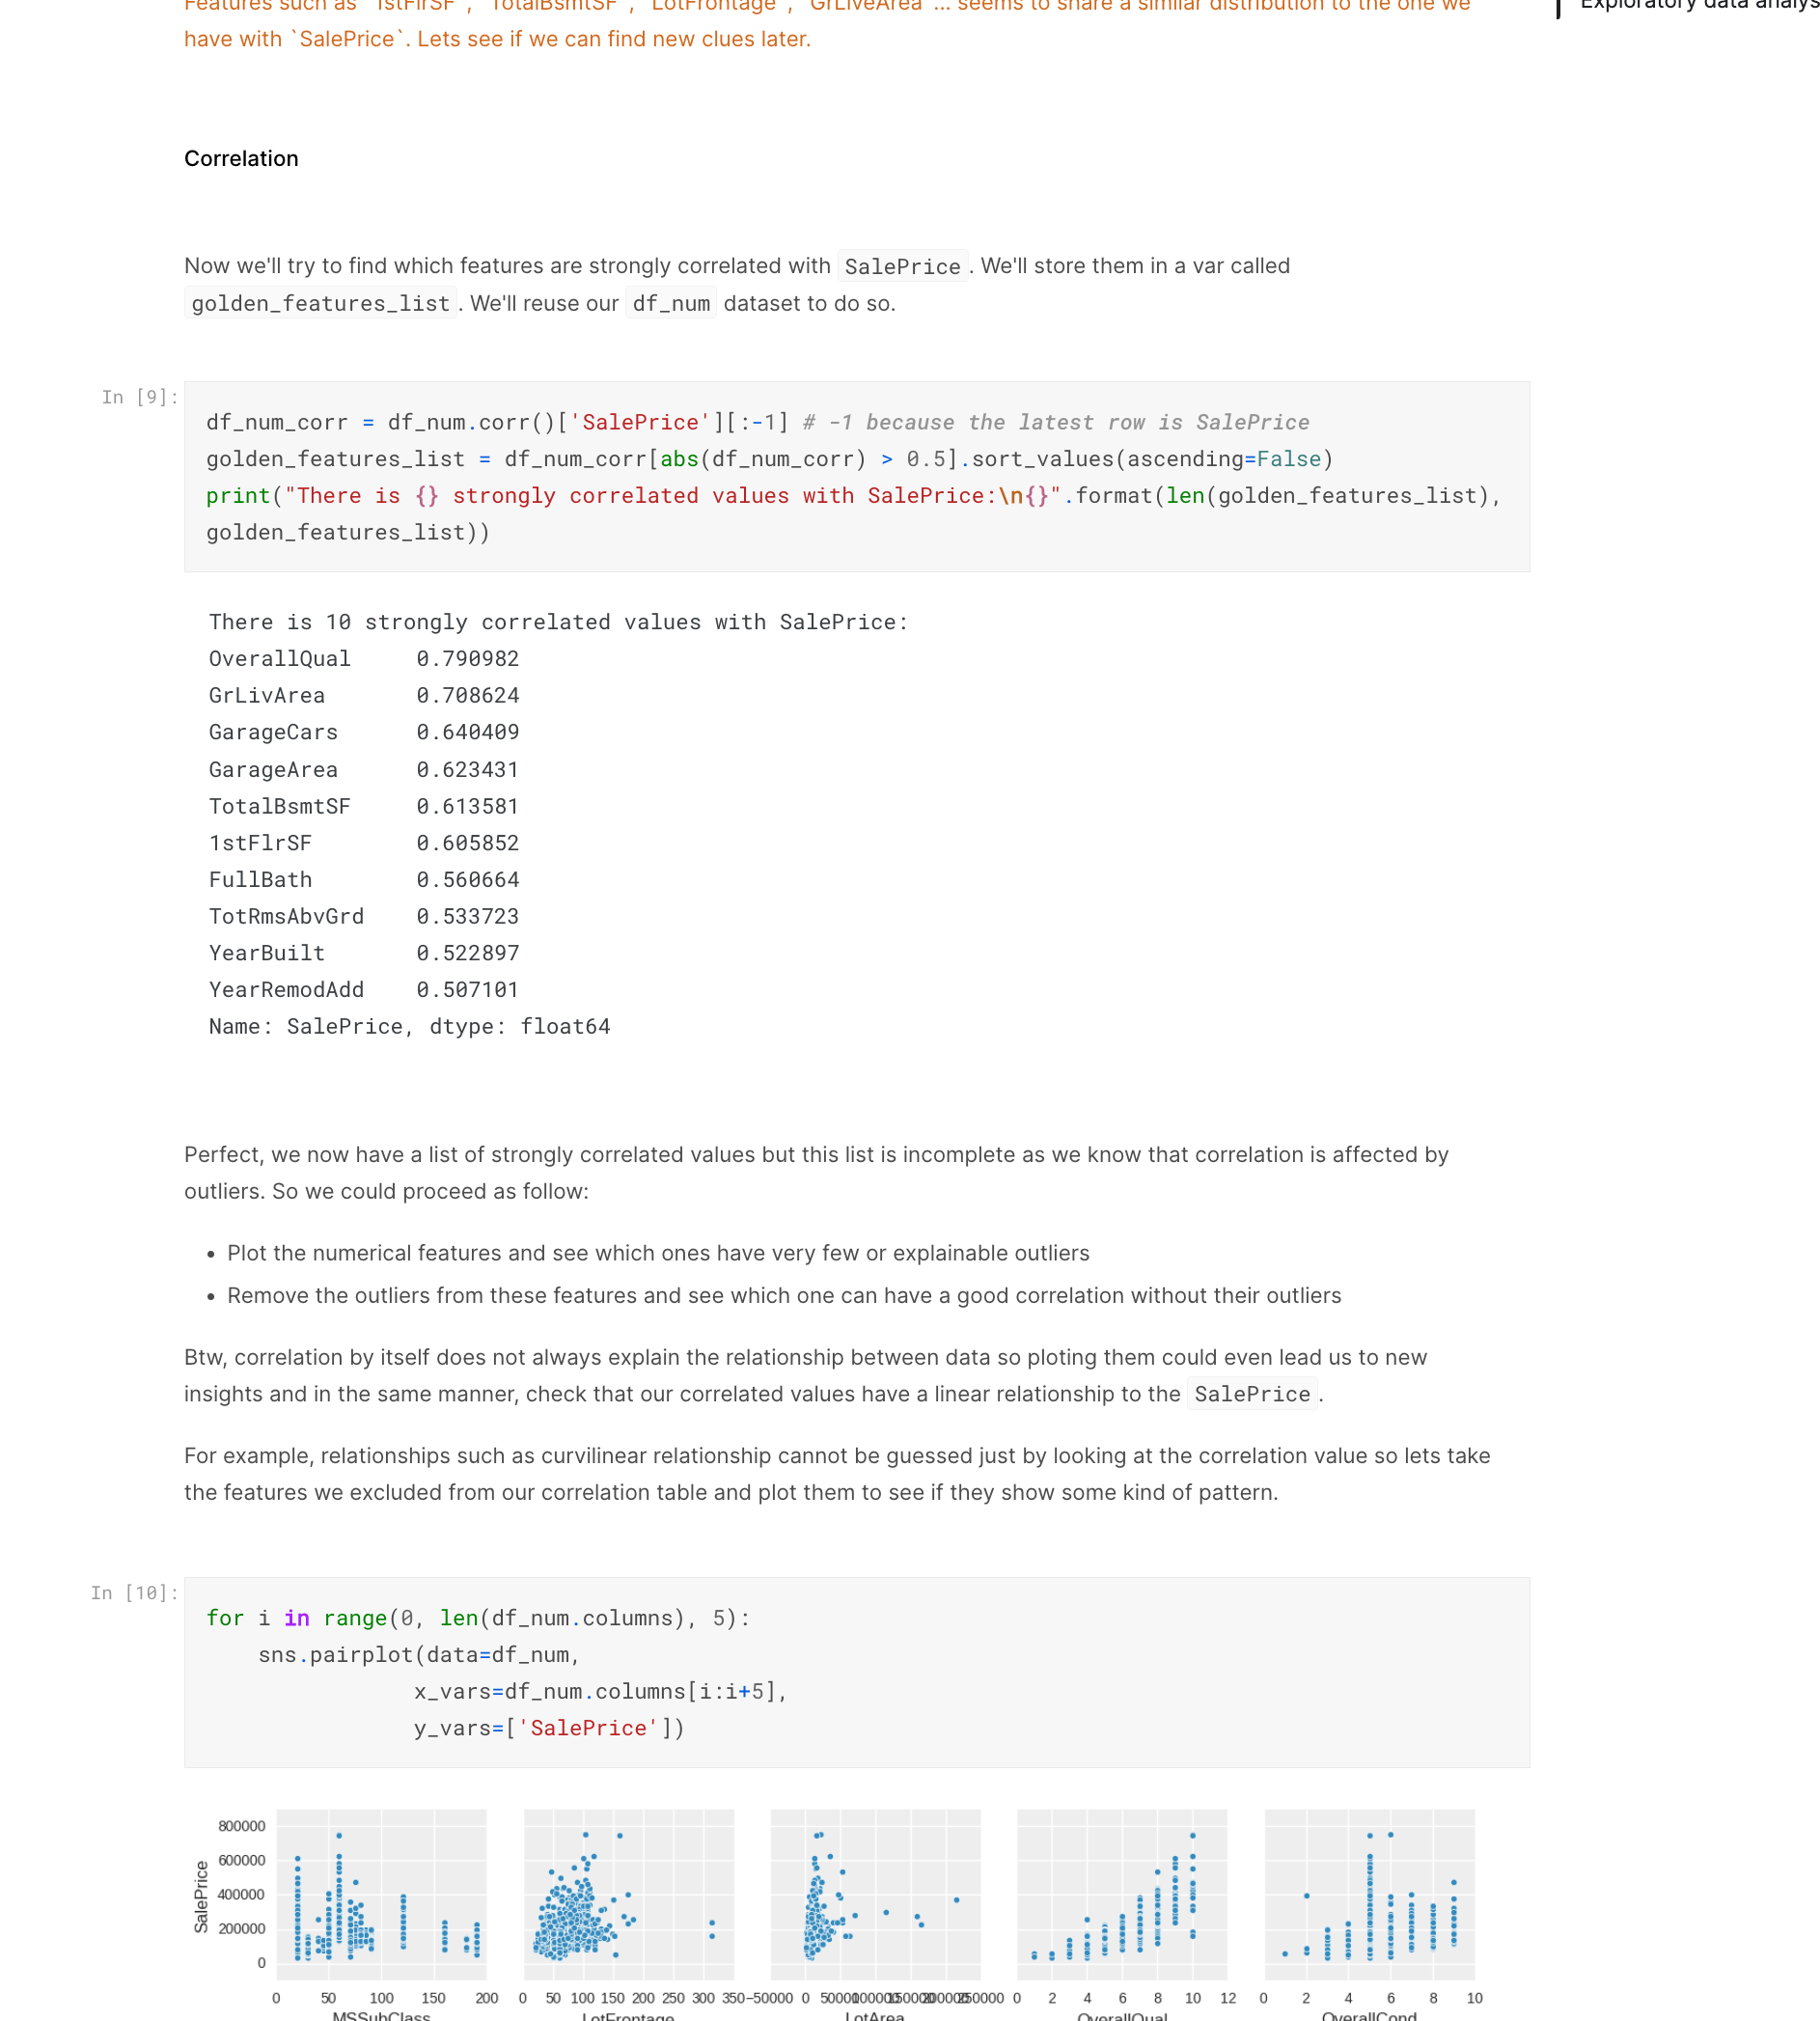

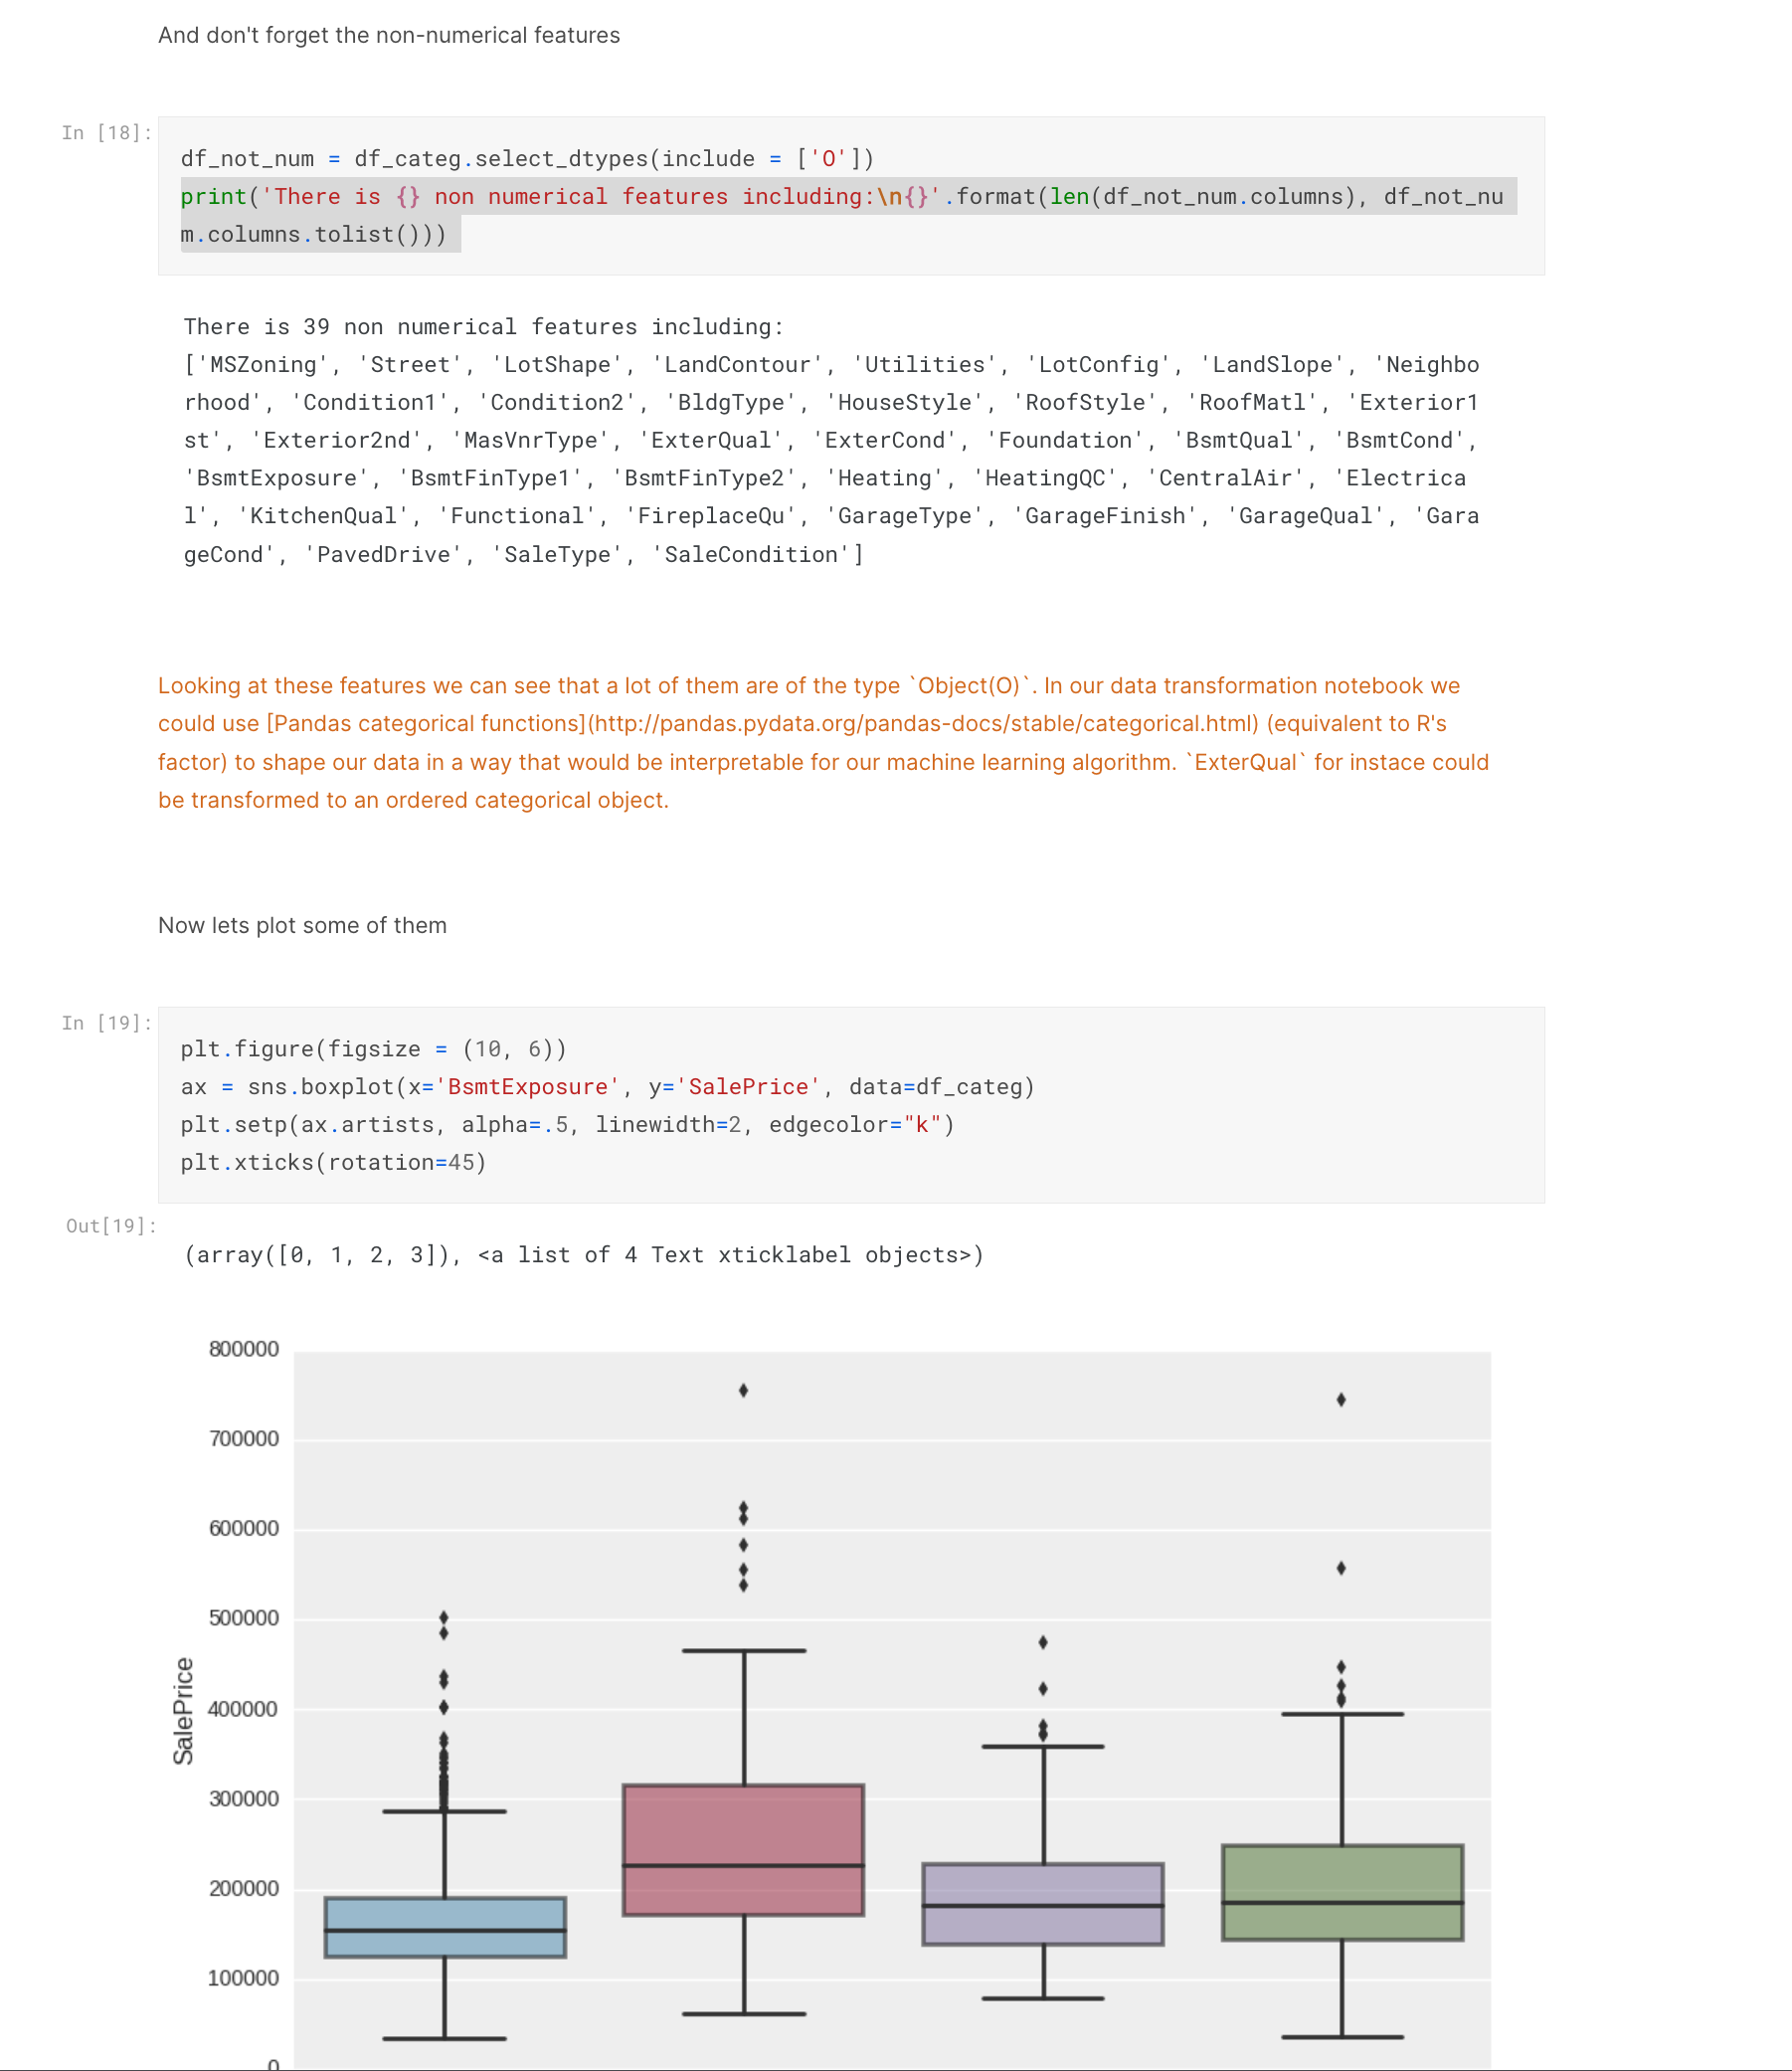

# LAbel Encoding
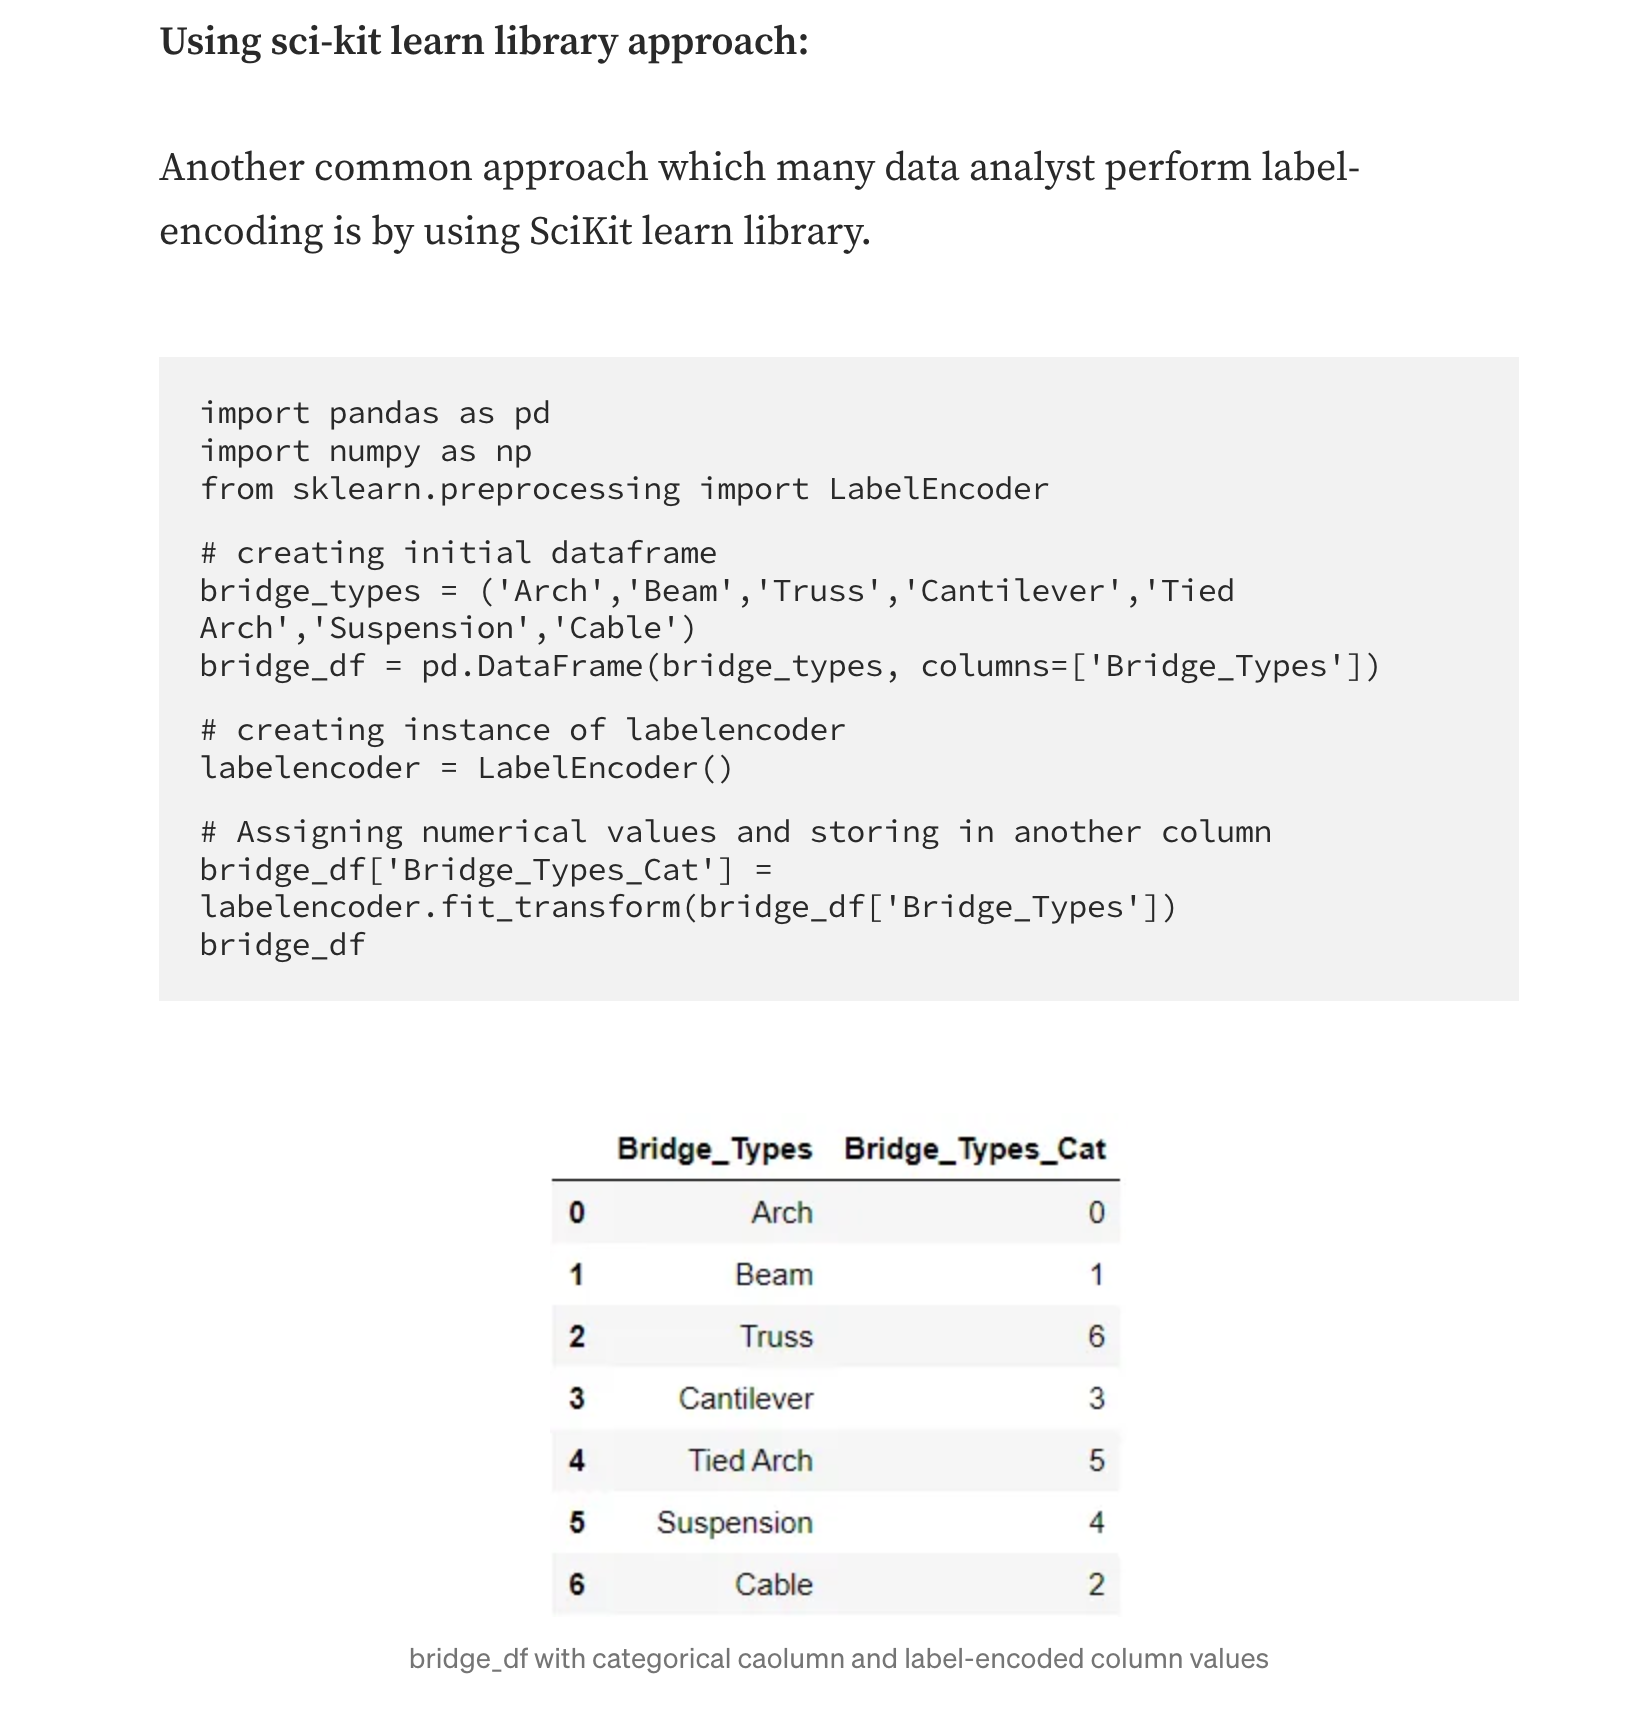

# One hot encoding

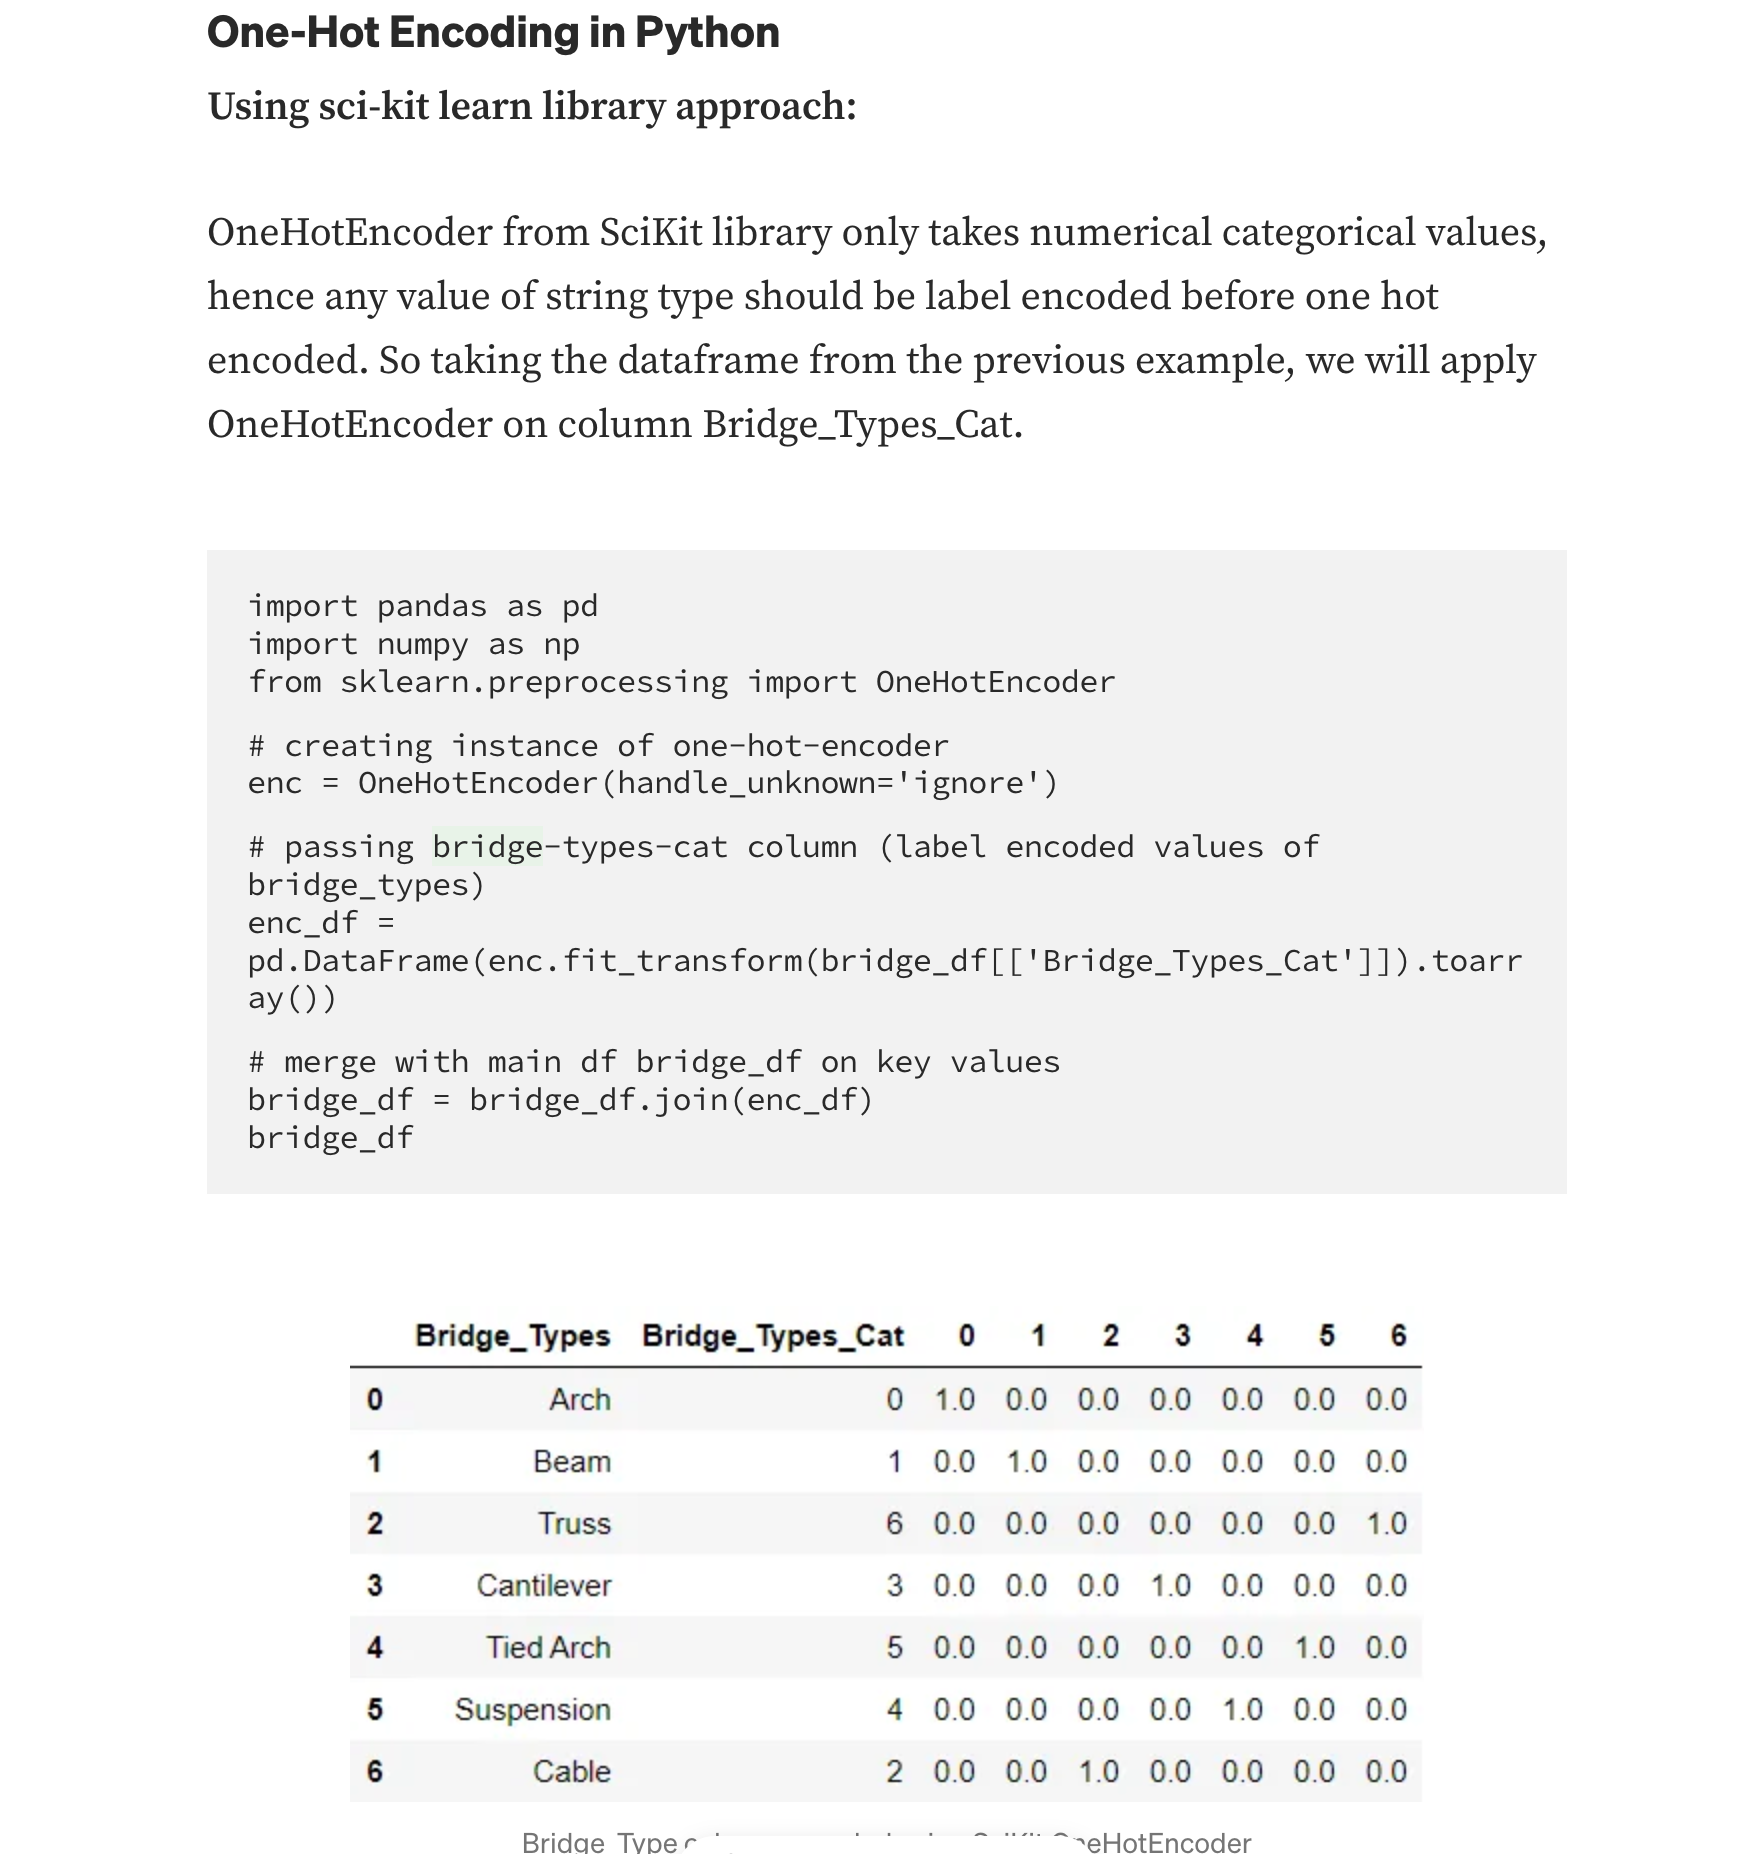

# Dummy values
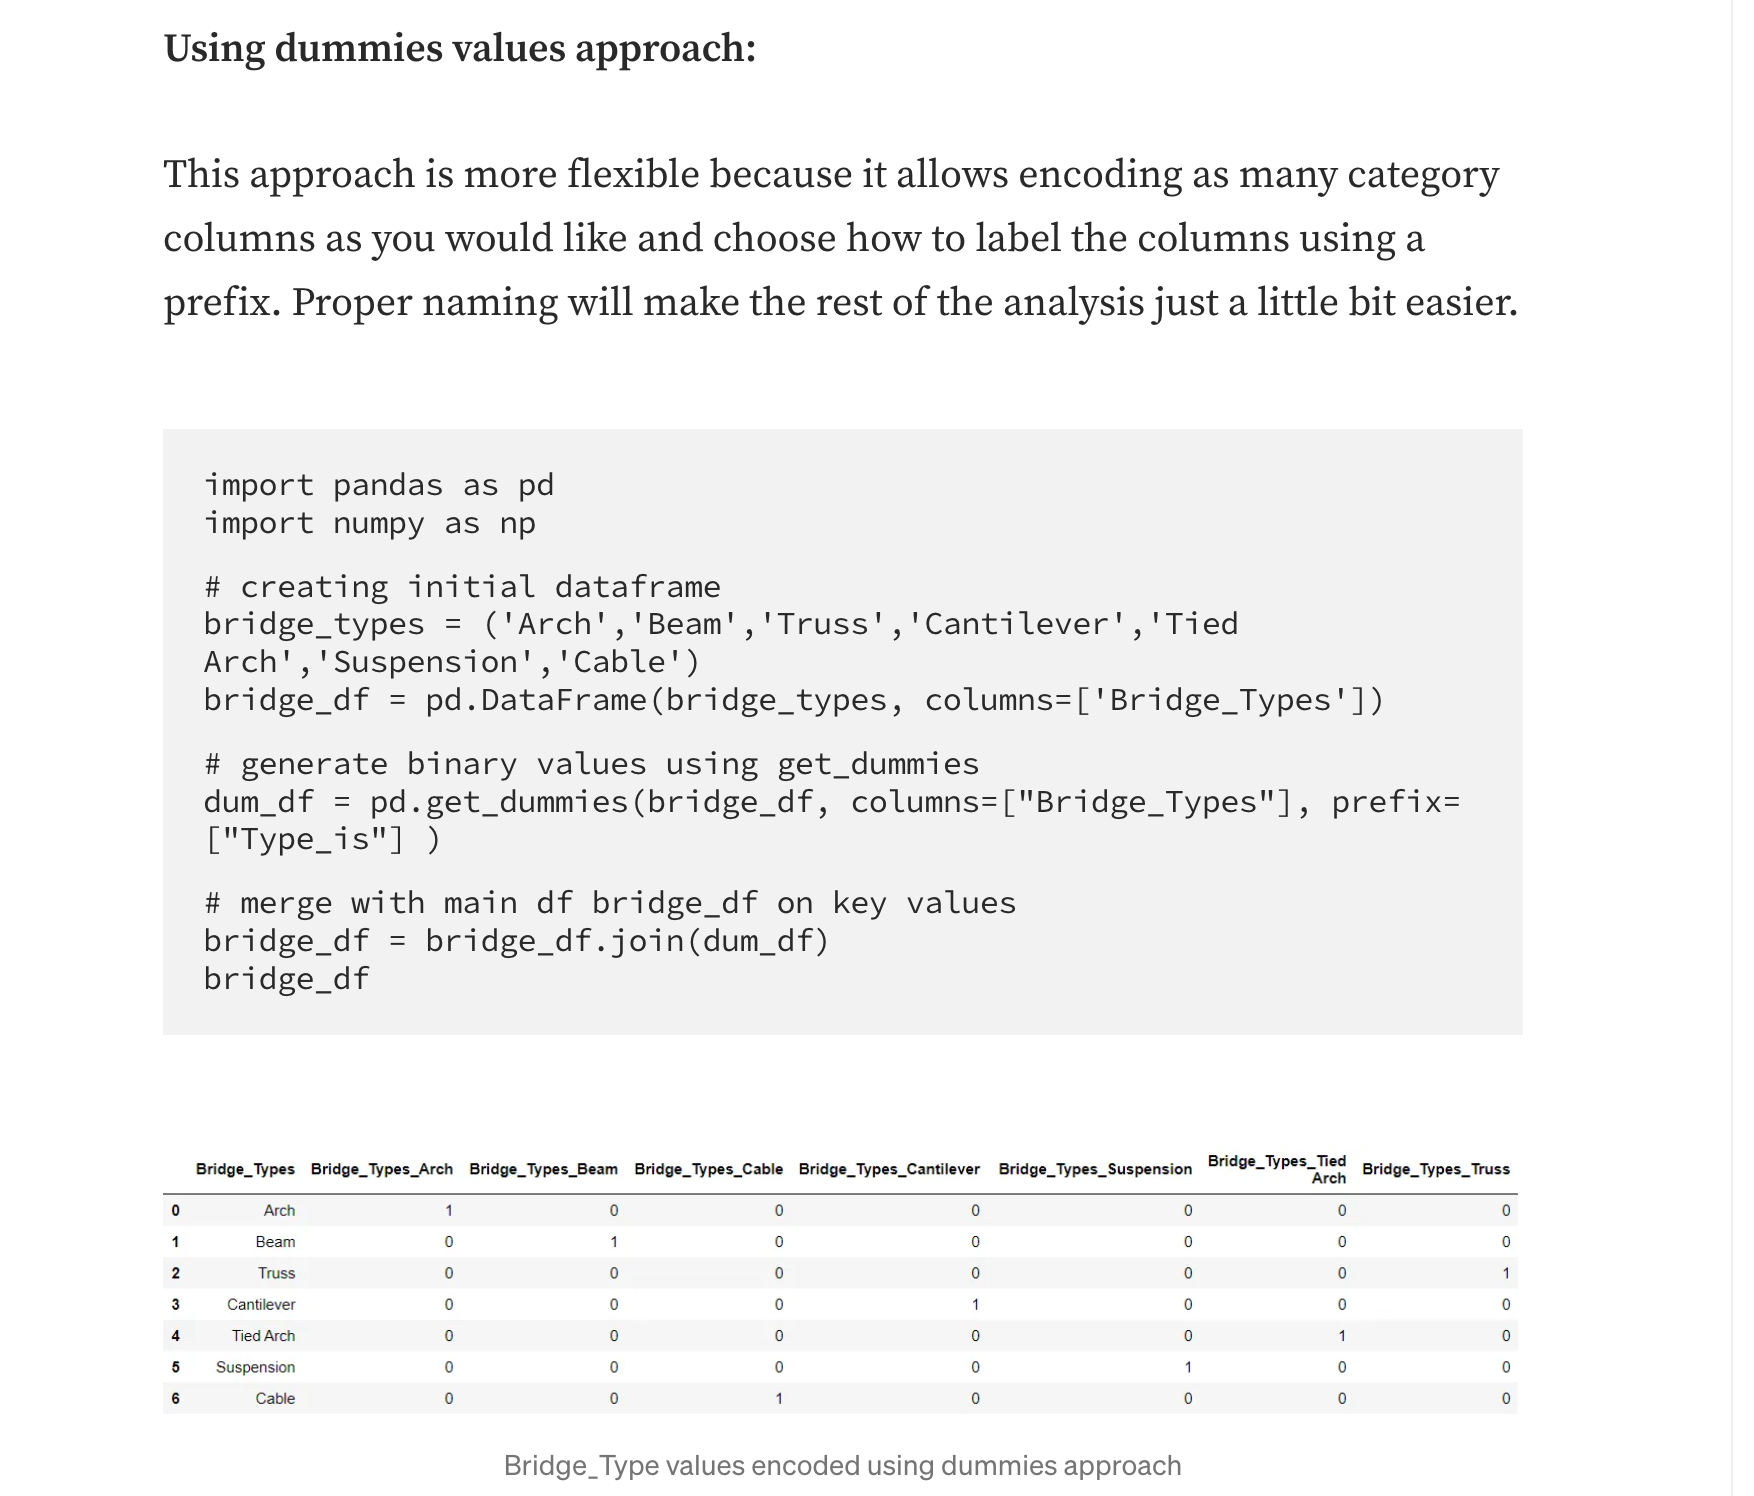

apply standardization ?
scaling features to have zero mean and unit variance


models:

- https://analyticsindiamag.com/7-types-classification-algorithms/#:~:text=Classification%20model%3A%20A%20classification%20model,of%20a%20phenomenon%20being%20observed.

- https://www.kaggle.com/code/abhigyan2311/binary-classification-using-machine-learning
... # Parameter estimating using GridSearch

- https://www.kaggle.com/code/davidrivasphd/binary-classification

- https://gist.github.com/lucasmoratof/ff0f7498a807ceb2ea26928049e2feb1
... multiple algorithms at once


- https://machinelearningmastery.com/calculate-feature-importance-with-python/

.. feature importance
decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
define the model
model = DecisionTreeRegressor()
fit the model
model.fit(X, y)
get importance
importance = model.feature_importances_
summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
### Check Data Consistency
# Is there any case where the loan_amnt or the funded_amnt is negative?
df['id'][(df.loan_amnt < 0)| (df.funded_amnt < 0)].count()

# Is there any case where the funded_amnt_inv is higher than the funded_amnt?
df['id'][df.funded_amnt_inv > df.funded_amnt ].count()
# Is there any case where the int_rate is negative?   
df['id'][df.int_rate < 0].count()   

In [ ]:
### Data Cleaning
### Treat Missing Values
#Replace missing values by de median
missing_values = ['dti', 'revol_util', 'inq_last_6mths'] 
for col in missing_values:
    med=df[col].median()
    df[col]=df[col].apply(lambda x: med if np.isnan(x) else x)

In [ ]:
### Total missing values
# Total missing values
mis_val = df.isnull().sum()
# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns

In [ ]:
# Treat Outliers

df = df[df.installment < 1500]
sns.boxplot(df['installment'])

In [ ]:
### 4.6.2 Encode Categorigal Variables
cat_var_to_encode = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose']
labelencoder = LabelEncoder()
for col in cat_var_to_encode:
    column = col + "_cat"
    df[column] = labelencoder.fit_transform(df[col])
df = df.drop(columns = cat_var_to_encode)

df['emp_length'] = df['emp_length'].replace({'< 1 year':0, '1 year': 1, 
                                             '2 years': 2, '3 years': 3, 
                                             '4 years': 4, '5 years': 5, 
                                             '6 years': 6, '7 years': 7, 
                                             '8 years': 8, '9 years': 9, 
                                             '10+ years': 10})

# Feature Selection

### RFE
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.



In [ ]:
train = final_df.iloc[:,:17]
target = final_df.iloc[:,-1]

# RFE with RandomForest:
model_rfe = RandomForestClassifier()
rfe = RFE(estimator = model_rfe, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = train, y = target) 
model_rfe.fit(X = X_rfe,y = target)
selected_features = pd.Series(rfe.ranking_, index = train.columns)
selected_features = selected_features.sort_values()
selected_features.head(10)

final_variables = selected_features.index[:10].to_list()
final_variables.append('Default Loan')
print(final_variables)

df_final = final_df.copy()
df_final = df_final[final_variables]

### Check if the dataset it's balanced



In [ ]:
# Check if the dataset it's balanced

target_pct = pd.DataFrame(df_final.groupby(['Default Loan'])['Default Loan'].count())
target_pct['%'] = (target_pct['Default Loan'] / target_pct['Default Loan'].sum())*100
target_pct

# We have an imbalanced dataset, which may cause overfititng on the model. 
# We could do oversampling or undersampling, however once the 'Default' 
# case it's not very frequent, we decided to use the  StratifiedKFold on the Cross-Validation and 
# the GridSearchCV on the hyperparameter tuning stage. in order to overcome the overfititng problem.



In [ ]:
data = df_final.iloc[:,0:10]
target = df_final.iloc[:,-1]
#  It is tricky in our dataset because it is not balanced. A stratified split is a good option here because it preserves the ratio between classes in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target)

In [ ]:
#### Split the Train Dataset into Train and Validation Dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.25, 
                                                  random_state=15, 
                                                  shuffle=True, 
                                                  stratify=y_train)


print('train:{}% | validation:{}% | test:{}%'.format((round(len(y_train)/len(target),2))*100,
                                                     (round(len(y_val)/len(target),2))*100,
                                                     (round(len(y_test)/len(target),2))*100
                                                    ))

Once the classes are unbalanced, we are going to use Stratified K Fold, as we don't want any folds to have only 1 particular class or even 1 class dominating the other one as it may create a bias in that particular fold. Stratification makes sure that the percentage of samples for each class is similar across folds.


In [ ]:
# Create a StratifiedKFold instance with 10 splits, to be used in cross validation and (later on GridSearch)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
acc = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
recall = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
precision = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='average_precision', n_jobs=-1)
f1_score =  cross_val_score(log_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
roc_auc =  cross_val_score(log_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std() * 2))

**- Hyperparameter Tuning Implementation**


In [ ]:
grid = {'penalty' : ['l1', 'l2'],
        'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear'],
        'class_weight' : ['None', 'balanced']}

model = LogisticRegression()
# Grid Search Implementation
clf = GridSearchCV(estimator = model, param_grid=grid, cv=cv, scoring= 'f1', n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

clf.best_params_

In [ ]:
clf_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), 
                         pd.DataFrame(clf.cv_results_["mean_test_score"], 
                                      columns=["F1 Score"])],axis=1)

# Sort the values according to the accuracy
clf_results.sort_values(by = ["F1 Score"], ascending = False).head(5) 